# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('../../Datasets/insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# One hot encoding: turn string column into 3 different columns (countries), for 3 different categories
# Bindary vector: each country to a certain order of the columns

# Coding independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create object of the column transformer class
# [0] is the index of column to apply OneHotEncoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')

# Apply the transform method to change the column X
X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9884.67  9724.53]
 [ 8617.73  8547.69]
 [44864.83 45702.02]
 [13218.47 12950.07]
 [ 9364.45  9644.25]
 [11629.91  4500.34]
 [ 2070.96  2198.19]
 [10606.02 11436.74]
 [ 7189.26  7537.16]
 [ 7894.81  5425.02]
 [ 8475.43  6753.04]
 [15902.45 10493.95]
 [ 9713.34  7337.75]
 [ 6954.37  4185.1 ]
 [23587.36 18310.74]
 [14072.07 10702.64]
 [14375.34 12523.6 ]
 [ 8359.86  3490.55]
 [ 6520.54  6457.84]
 [34022.75 33475.82]
 [23600.09 23967.38]
 [12666.55 12643.38]
 [13580.03 23045.57]
 [27973.92 23065.42]
 [ 1573.69  1674.63]
 [11006.22  4667.61]
 [13182.42  3732.63]
 [ 7184.23  7682.67]
 [ 3758.19  3756.62]
 [ 8670.45  8413.46]
 [ 7409.09  8059.68]
 [48838.78 48970.25]
 [14940.99 12979.36]
 [10339.3  20630.28]
 [15372.98 14571.89]
 [ 3877.05  4137.52]
 [ 8320.09  8347.16]
 [37695.22 51194.56]
 [40541.99 40003.33]
 [ 3984.62  1880.49]
 [11083.67  5458.05]
 [ 2925.14  2867.12]
 [20751.02 20149.32]
 [48132.78 47496.49]
 [37212.77 36149.48]
 [ 7664.52 26018.95]
 [14072.07 19749.38]
 [ 6710.8   6

## Evaluating the Model Performance

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8624549417996137

          Gini-importance
age              0.004243
sex              0.003466
bmi              0.543892
children         0.057891
smoker           0.005014
region           0.005510
charges          0.004051


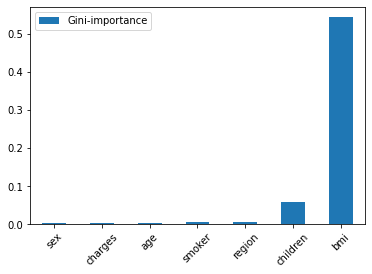

In [8]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(dataset.columns, regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
print(importances)

In [9]:
# import seaborn as sns
# sns.heatmap(dataset.corr(),cmap='magma')

In [10]:
# inputs = [90, 'male', 23, 2, 'yes', 'northwest']
# regressor.predict(ct.transform([inputs]))

In [14]:
def predict():
    user_inputs = []
    age = float(input("How old are you? "))
    user_inputs.append(age)
    gender = input("What is your gender? (male/female)").lower()
    user_inputs.append(gender)
    bmi = input("What is your bmi?")
    user_inputs.append(bmi)
    children = input("How many children are covered under your plan?")
    user_inputs.append(children)
    smoker = input("Do you smoke? (yes/no)")
    user_inputs.append(smoker)
    region = input("What region of the US do you currently live in?")
    user_inputs.append(region)
    
    predicted_value = regressor.predict(ct.transform([user_inputs]))
    
    print(f'''The predicted value for the inputs: 
          age: {user_inputs[0]} 
          gender: {user_inputs[1]}
          bmi: {user_inputs[2]}
          number of children: {user_inputs[3]}
          smoker: {user_inputs[4]}
          region: {user_inputs[5]}
          is: ${predicted_value[0]}''')

predict()

How old are you? 22
What is your gender? (male/female)male
What is your bmi?22
How many children are covered under your plan?2
Do you smoke? (yes/no)no
What region of the US do you currently live in?northwest
The predicted value for the inputs: 
          age: 22.0 
          gender: male
          bmi: 22
          number of children: 2
          smoker: no
          region: northwest
          is: $3467.64703
